## Pandas ile Web'ten veri çekme

### İnternetten Veri Çekme

In [3]:
import pandas as pd

In [10]:
import pandas as pd
import requests

url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'

# 1. Adım: Kimlik bilgilerini (header) hazırlayın
headers = {
    'User-Agent': 'BenimBotum/1.0 (iletisim@eposta.com)'
}

# 2. Adım: Sayfayı requests ile çekin
response = requests.get(url, headers=headers)

# 3. Adım: Pandas ile gelen HTML içeriğini okuyun
tablolar = pd.read_html(response.text)

# İlk tabloyu göster
df=tablolar[0]
df.head()

/tmp/ipython-input-1974727401.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tablolar = pd.read_html(response.text)


,Location,Population,% of world,Date,Source (official or from the United Nations),Notes
0,World,8232000000,100%,13 Jun 2025,UN projection[1][3],NaN
1,India,1417492000,17.2%,1 Jul 2025,Official projection[4],[b]
2,China,1408280000,17.1%,31 Dec 2024,Official estimate[5],[c]
3,United States,340110988,4.1%,1 Jul 2024,Official estimate[6],[d]
4,Indonesia,284438782,3.5%,30 Jun 2025,National annual projection[7],NaN


<Axes: xlabel='Location'>

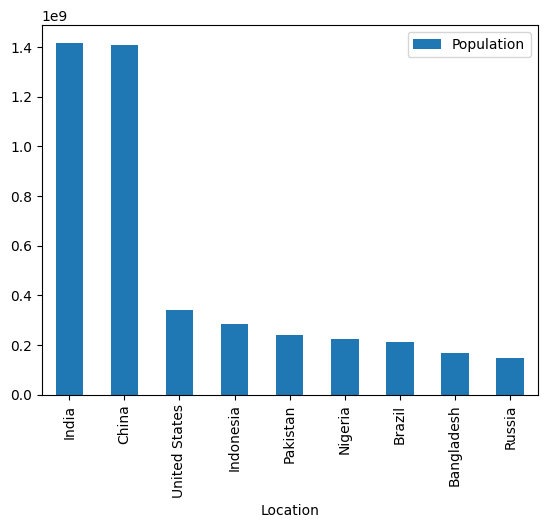

In [14]:
df.set_index('Location', inplace=True)
df.iloc[1:10].plot(kind='bar')

## Web üzerinden bir dosya çekmek Python kütüphaneleriyle

In [18]:
import io
import zipfile

In [19]:
response = requests.get(r'https://archive.ics.uci.edu/static/public/53/iris.zip')
zip_file_bytes = io.BytesIO(response.content)
with zipfile.ZipFile(zip_file_bytes, 'r') as zip_ref:
    zip_ref.extractall('.')

## Terminal komutlarıyla

In [20]:
!wget https://archive.ics.uci.edu/static/public/53/iris.zip

--2026-01-02 17:50:01--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2026-01-02 17:50:02 (664 MB/s) - ‘iris.zip’ saved [3738]



In [21]:
!unzip iris.zip

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


## Webte gerçek bir CSV dosyasından veri çekmek

In [24]:
pd.read_csv(r'https://sagemaker-sample-files.s3.amazonaws.com/datasets/tabular/synthetic/churn.csv')

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,PA,163,806,403-2562,no,yes,300,8.162204,3,7.579174,...,4,6.508639,4.065759,100,5.111624,4.928160,6,5.673203,3,True.
1,SC,15,836,158-8416,yes,no,0,10.018993,4,4.226289,...,0,9.972592,7.141040,200,6.436188,3.221748,6,2.559749,8,False.
2,MO,131,777,896-6253,no,yes,300,4.708490,3,4.768160,...,3,4.566715,5.363235,100,5.142451,7.139023,2,6.254157,4,False.
3,WY,75,878,817-5729,yes,yes,700,1.268734,3,2.567642,...,5,2.333624,3.773586,450,3.814413,2.245779,6,1.080692,6,False.
4,WY,146,878,450-4942,yes,no,0,2.696177,3,5.908916,...,3,3.670408,3.751673,250,2.796812,6.905545,4,7.134343,6,True.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NH,4,787,151-3162,yes,yes,800,10.862632,5,7.250969,...,1,8.026482,4.921314,350,6.748489,4.872570,8,2.122530,9,False.
4996,SD,140,836,351-5993,no,no,0,1.581127,8,3.758307,...,7,1.328827,0.939932,300,4.522661,6.938571,2,4.600473,4,False.
4997,SC,32,836,370-3127,no,yes,700,0.163836,5,4.243980,...,3,2.340554,0.939469,450,5.157898,4.388328,7,1.060340,6,False.
4998,MA,142,776,604-2108,yes,yes,600,2.034454,5,3.014859,...,3,3.470372,6.076043,150,4.362780,7.173376,3,4.871900,7,True.


## BS4 kütüphanesi

In [25]:
pip install bs4

In [26]:
from bs4 import BeautifulSoup
import requests

In [32]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
page = requests.get(r'https://www.artificialintelligence-news.com/news/rail-ai-in-the-uk-beyond-predictive-maintenance/', headers=headers)
page

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

url = "https://www.imdb.com/chart/top/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36",
    "Accept-Language": "en-US,en;q=0.5" # Başlıkların İngilizce kalması için
}

response = requests.get(url, headers=headers)

# Hata ayıklama için: İstek durumunu kontrol et
print(f"HTTP Status Code: {response.status_code}")

if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    # Hata ayıklama için: Parse edilen HTML içeriğinin uzunluğunu kontrol et
    # print(f"Parsed HTML Content Length: {len(soup.prettify())}") # Çok uzun olabilir, dikkatli kullanın

    # Filmlerin bulunduğu liste öğeleri (Güncel IMDb yapısına göre kontrol edin)
    # IMDb'nin yapısı sık değişebilir. 'ipc-metadata-list-summary-item' hala doğru görünüyor.
    movies = soup.find_all("li", class_="ipc-metadata-list-summary-item")

    # Hata ayıklama için: Bulunan film sayısı
    print(f"Bulunan film sayısı: {len(movies)}")

    data = []

    for movie in movies:
        try:
            # 1. Başlık (Title)
            title_tag = movie.find("h3", class_="ipc-title__text")
            title = title_tag.text.split(". ", 1)[1] if title_tag else "N/A"

            # 2. Yıl (Metadata) - Daha kararlı sınıf: 'cli-title-metadata-item'
            # Yıl genellikle ilk metadata öğesidir.
            metadata = movie.find_all("span", class_="cli-title-metadata-item")
            year = metadata[0].text if metadata else "N/A"

            # 3. Puan (Rating) - Güncel IMDb yapısına göre düzeltildi
            # Puan genellikle 'ipc-rating-star__rating' sınıfına sahip bir div içinde yer alır.
            rating_tag = movie.find("div", class_="ipc-rating-star__rating")
            rating = rating_tag.text.strip() if rating_tag else "N/A"

            data.append({"Title": title, "Year": year, "Rating": rating})

        except (IndexError, AttributeError) as e:
            # Hatalı satırı atla ama döngüyü kırma
            print(f"Bir film öğesi işlenirken hata oluştu: {e}. Bu öğe atlanıyor.")
            continue

    df = pd.DataFrame(data)
    print(df.head())
    print(f"Toplam çekilen film sayısı: {len(df)}")
else:
    print(f"Web sayfası alınamadı. HTTP Durum Kodu: {response.status_code}")
    df = pd.DataFrame()


HTTP Status Code: 200
Bulunan film sayısı: 25
Bir film öğesi işlenirken hata oluştu: list index out of range. Bu öğe atlanıyor.
Bir film öğesi işlenirken hata oluştu: list index out of range. Bu öğe atlanıyor.
Bir film öğesi işlenirken hata oluştu: list index out of range. Bu öğe atlanıyor.
Bir film öğesi işlenirken hata oluştu: list index out of range. Bu öğe atlanıyor.
Bir film öğesi işlenirken hata oluştu: list index out of range. Bu öğe atlanıyor.
Bir film öğesi işlenirken hata oluştu: list index out of range. Bu öğe atlanıyor.
Bir film öğesi işlenirken hata oluştu: list index out of range. Bu öğe atlanıyor.
Bir film öğesi işlenirken hata oluştu: list index out of range. Bu öğe atlanıyor.
Bir film öğesi işlenirken hata oluştu: list index out of range. Bu öğe atlanıyor.
Bir film öğesi işlenirken hata oluştu: list index out of range. Bu öğe atlanıyor.
Bir film öğesi işlenirken hata oluştu: list index out of range. Bu öğe atlanıyor.
Bir film öğesi işlenirken hata oluştu: list index ou

## Kopyalanmış bir veriyi okuma

In [43]:
panodaki_veri = """
Sıra	İsim	Servet
1	Jeff Bezos	$177 milyar
2	Elon Musk	$151 milyar
3	Bernard Arnault & ailesi	$150 milyar
4	Bill Gates	$124 milyar
"""

In [44]:
import pandas as pd
import io
df_clp = pd.read_csv(io.StringIO(panodaki_veri), sep='\t')

print(df_clp)

   Sıra                      İsim       Servet
0     1                Jeff Bezos  $177 milyar
1     2                 Elon Musk  $151 milyar
2     3  Bernard Arnault & ailesi  $150 milyar
3     4                Bill Gates  $124 milyar


## Görsel indirme scripti

In [46]:
pip install bing-image-downloader

In [48]:
from bing_image_downloader import downloader

In [49]:
downloader.download('bird',
                    limit=100)

Streaming output truncated to the last 5000 lines.



[!!]Indexing page: 1227

[%] Indexed 29 Images on Page 1227.




[!!]Indexing page: 1228

[%] Indexed 29 Images on Page 1228.




[!!]Indexing page: 1229

[%] Indexed 29 Images on Page 1229.




[!!]Indexing page: 1230

[%] Indexed 29 Images on Page 1230.




[!!]Indexing page: 1231

[%] Indexed 29 Images on Page 1231.




[!!]Indexing page: 1232

[%] Indexed 29 Images on Page 1232.




[!!]Indexing page: 1233

[%] Indexed 29 Images on Page 1233.




[!!]Indexing page: 1234

[%] Indexed 29 Images on Page 1234.




[!!]Indexing page: 1235

[%] Indexed 29 Images on Page 1235.




[!!]Indexing page: 1236

[%] Indexed 29 Images on Page 1236.




[!!]Indexing page: 1237

[%] Indexed 29 Images on Page 1237.




[!!]Indexing page: 1238

[%] Indexed 29 Images on Page 1238.




[!!]Indexing page: 1239

[%] Indexed 29 Images on Page 1239.




[!!]Indexing page: 1240

[%] Indexed 29 Images on Page 1240.




[!!]Indexing page: 1241

[%] Indexed

In [ ]:
from bing_image_downloader import downloader

downloader.download(
    query,
    limit=100,
    output_dir='dataset',
    adult_filter_off=True,
    force_replace=False,
    timeout=60,
    filter="photo",
    verbose=True
)